# Mini-Project 3: Linear Regression Models for Housing Price Predictions

### Mathematical Data Science, Fall, 2018 (RWU)
  
### Name 1: Jake Souza

### Name 2: Nate Affsa


<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png"></img>

### Project Overview:
In this project you are going to develop linear regression models to predict housing price of Melbourne Australia. The dataset **Melbourne_housing.csv** can be downloaded from Bridges. Atributes (features) are numeric and categorical so you have to figure out how to handle data. It is a regression problem, which is an easier type of supervised learning algorithm. 

### Project Expectations:

#### 1. Exploratory Data Analysis
- Ability to import new python modules.
- Loading and inspecting the data to get basic information.
- Data visualization.
- Cleaning the data and handling the missing values (if any).
- Feature selections, data filtering, and data preprocessing.
- Creating the tidy data for feeding to learning algorithms.


#### 2. Creating and Testing Prediction Models

- Creating, fitting, and testing linear regression models.
- Proformance  analysis and model selections.
- Predicting the prices of new housing data.


In [238]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Part I:  Exploratory Data Analysis
In this section you will perform some exploratory analysis to uncover the structure of the data. 

**Question 1**. Import necessary libraries, load the **Melbourne_housing.csv** data set, and provide basic information about the data. You can use functions such as **head()**, **info()**, **describe().T**. How many observations are there in the data? What are features (columns)? 


In [239]:
path = 'Data/Melbourne_housing.csv'
mel = pd.read_csv(path, sep=',')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [240]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


In [241]:
mel.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29217.000000,2.285000e+04,29217.000000,29217.000000,22665.000000,22659.000000,22357.000000,19649.000000,11817.000000,13473.000000,22878.000000,22878.000000,29215.000000
mean,3.013451,1.056543e+06,10.826519,3113.517952,3.029605,1.601174,1.682784,581.161382,157.422735,1964.937876,-37.812002,145.001545,7535.831936
std,0.975952,6.466137e+05,6.501154,102.778677,0.996666,0.721436,0.995973,3591.192385,427.686929,37.421665,0.085665,0.114382,4421.509141
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.370000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861300,144.936700,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,486.000000,132.000000,1970.000000,-37.808800,145.006400,6567.000000
75%,4.000000,1.300000e+06,13.800000,3152.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757393,145.068630,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


**Question 2**. Create two different data sets namely, **data_numeric** and **data_categorical** by selecting **number (float64 or int64)** datatype and **object** datatype respectively from the original dataset. Since Regression Models are more suited for the numerical features, we will be working on numeric dataset later in the project. 

**Hint: data.select_dtypes(include=[np.number])**.

In [242]:
data_numeric = mel.select_dtypes(include=[np.number])
data_numeric.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [243]:
data_categorical = mel.select_dtypes(include=[np.object])
data_categorical.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


**Question 3**. Although some of the features such as **Postcode, YearBuilt** in **data_numeric** dataset are numeric types, they are actually categorical. Remove these variables, including  **Lattitude, Longtitude, Propertycount** and then save the result back to **data_numeric** dataset.

In [244]:
data_numeric = data_numeric.drop(['Lattitude', 'Longtitude', 'Propertycount'], axis=1)
data_numeric.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,NaN,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN
1,2,1480000.0,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN
2,2,1035000.0,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0
3,3,NaN,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN
4,3,1465000.0,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0


**Question 4**. Visualize the relationships among the features. You may use **pariplot()**, **heatmap()**,  including others, to see the correlations. What are the five most correlated features (positive or negative) with price? Select thesee features, including the **price** and save in the new data set, namely, **data_filtered**. 

In [245]:
corr = data_numeric.corr()
corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Rooms,1.000000,0.474655,0.271064,0.081107,0.939754,0.610294,0.401491,0.034560,0.149738,-0.035712
Price,0.474655,1.000000,-0.193687,0.063992,0.448231,0.444152,0.220543,0.033844,0.099782,-0.322389
Distance,0.271064,-0.193687,1.000000,0.469313,0.275827,0.124429,0.249111,0.054214,0.083526,0.293790
Postcode,0.081107,0.063992,0.469313,1.000000,0.084388,0.117697,0.072651,0.038922,0.046217,0.069613
Bedroom2,0.939754,0.448231,0.275827,0.084388,1.000000,0.614121,0.394643,0.034167,0.147574,-0.023203
Bathroom,0.610294,0.444152,0.124429,0.117697,0.614121,1.000000,0.313380,0.036916,0.140759,0.157643
Car,0.401491,0.220543,0.249111,0.072651,0.394643,0.313380,1.000000,0.037019,0.105775,0.117999
Landsize,0.034560,0.033844,0.054214,0.038922,0.034167,0.036916,0.037019,1.000000,0.392359,0.041117
BuildingArea,0.149738,0.099782,0.083526,0.046217,0.147574,0.140759,0.105775,0.392359,1.000000,0.052883
YearBuilt,-0.035712,-0.322389,0.293790,0.069613,-0.023203,0.157643,0.117999,0.041117,0.052883,1.000000


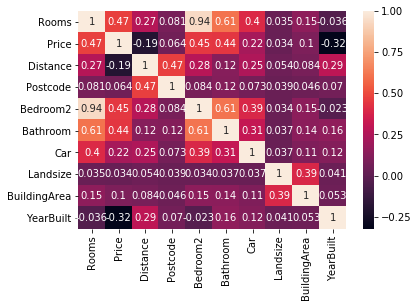

In [246]:
sb.heatmap(data_numeric.corr(), annot=True)
plt.show()

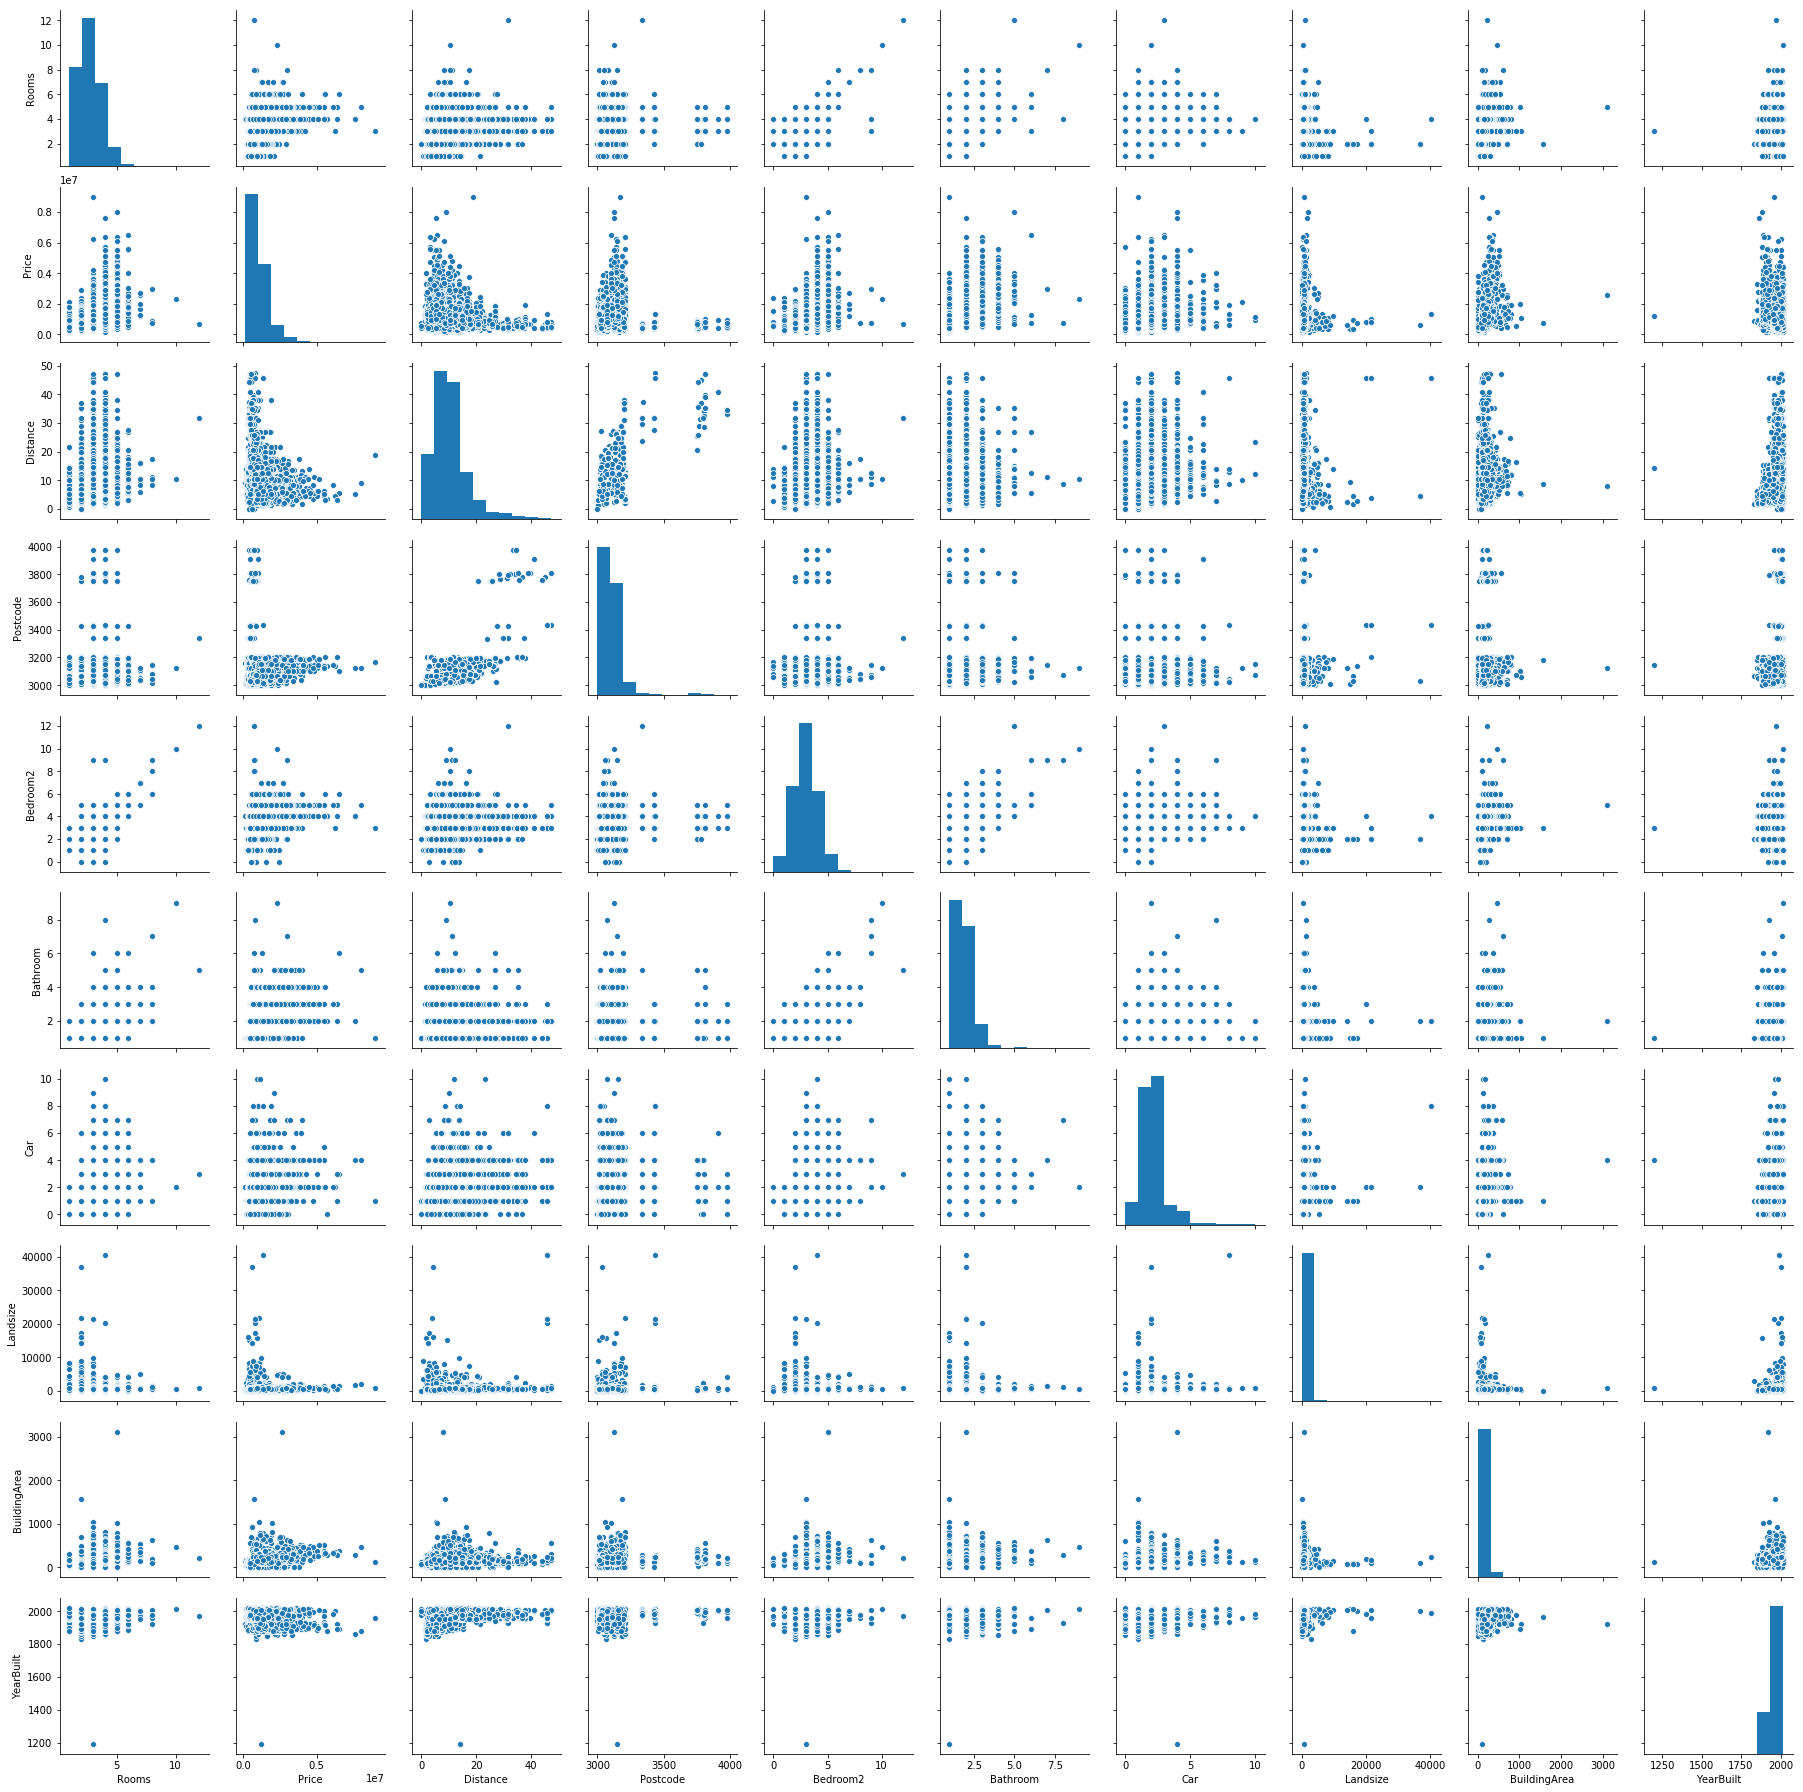

In [247]:
sb.pairplot(data_numeric.dropna())
plt.show()

In [254]:
corr.nlargest(6, "Price")

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Price,0.474655,1.000000,-0.193687,0.063992,0.448231,0.444152,0.220543,0.033844,0.099782,-0.322389
Rooms,1.000000,0.474655,0.271064,0.081107,0.939754,0.610294,0.401491,0.034560,0.149738,-0.035712
Bedroom2,0.939754,0.448231,0.275827,0.084388,1.000000,0.614121,0.394643,0.034167,0.147574,-0.023203
Bathroom,0.610294,0.444152,0.124429,0.117697,0.614121,1.000000,0.313380,0.036916,0.140759,0.157643
Car,0.401491,0.220543,0.249111,0.072651,0.394643,0.313380,1.000000,0.037019,0.105775,0.117999
BuildingArea,0.149738,0.099782,0.083526,0.046217,0.147574,0.140759,0.105775,0.392359,1.000000,0.052883


In [255]:
data_filtered = data_numeric
data_filtered = data_filtered.drop(['Landsize', 'YearBuilt', 'Postcode', 'Distance'], axis=1)
data_filtered.head()

,Rooms,Price,Bedroom2,Bathroom,Car,BuildingArea
0,2,NaN,2.0,1.0,1.0,NaN
1,2,1480000.0,2.0,1.0,1.0,NaN
2,2,1035000.0,2.0,1.0,0.0,79.0
3,3,NaN,3.0,2.0,1.0,NaN
4,3,1465000.0,3.0,2.0,0.0,150.0


**Question 5**. Based on your results in question 4, answer the following questions.

1. What is the correlation coefficient between **Rooms** and **Bedroom2** features? What can you conclude from this correlation?

2. What are correlation coefficients of these with **Price**? What can you conclude from these correlations?

To have better understanding about these relationships, you can use **jointplot()** function from seaborn library to visualize the realationship between the following.

1. **Price** and **Rooms** 
2. **Price** and **Bedroom2** 
3. **Bedroom2** and **Rooms** 



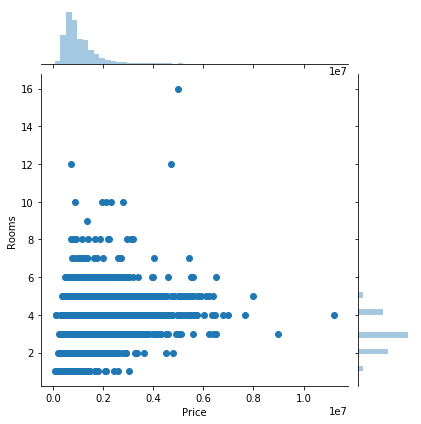

In [256]:
sb.jointplot(data_filtered["Price"], data_filtered['Rooms'])

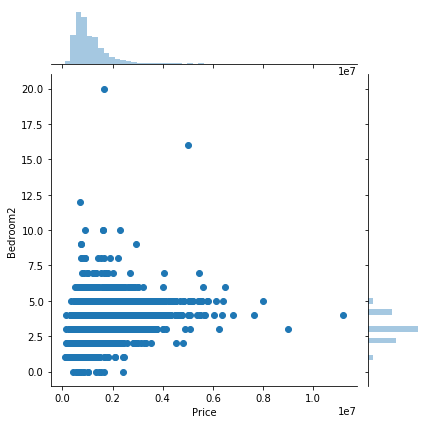

In [257]:
sb.jointplot(data_filtered["Price"], data_filtered['Bedroom2'])

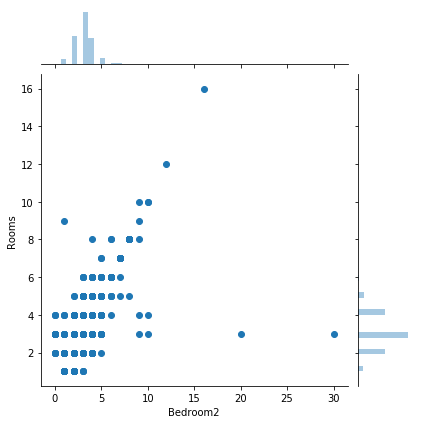

In [258]:
sb.jointplot(data_filtered["Bedroom2"], data_filtered['Rooms'])

**Question 6**. Based on your analysis in problem 5, you can drop one of the variables, **Rooms** or **Bedroom2** (why??). Say you removed **Rooms**. Save the result in the **data_filtered** data set. Furthermore, rename some of the features to have more sense about the features.

- Replace **Bedroom2**  by **Bedroom**
- Replace **Car** by **Parking**


In [259]:
data_filtered = data_filtered.drop("Rooms", axis = 1)
data_filtered.head()

,Price,Bedroom2,Bathroom,Car,BuildingArea
0,NaN,2.0,1.0,1.0,NaN
1,1480000.0,2.0,1.0,1.0,NaN
2,1035000.0,2.0,1.0,0.0,79.0
3,NaN,3.0,2.0,1.0,NaN
4,1465000.0,3.0,2.0,0.0,150.0


In [260]:
data_filtered = data_filtered.rename(index=str, columns={"Bedroom2": "Bedroom"})
data_filtered.head()

,Price,Bedroom,Bathroom,Car,BuildingArea
0,NaN,2.0,1.0,1.0,NaN
1,1480000.0,2.0,1.0,1.0,NaN
2,1035000.0,2.0,1.0,0.0,79.0
3,NaN,3.0,2.0,1.0,NaN
4,1465000.0,3.0,2.0,0.0,150.0


In [261]:
data_filtered = data_filtered.rename(index=str, columns={"Car": "Parking"})
data_filtered.head()

,Price,Bedroom,Bathroom,Parking,BuildingArea
0,NaN,2.0,1.0,1.0,NaN
1,1480000.0,2.0,1.0,1.0,NaN
2,1035000.0,2.0,1.0,0.0,79.0
3,NaN,3.0,2.0,1.0,NaN
4,1465000.0,3.0,2.0,0.0,150.0



**Question 7**. At this point, the original data is significantly filtered. However, it still needs to be cleaned further before feeding to machine learing algorithm. This includes missing value imputation, outliers detection, transformations, and many other related problems. 

1. Are there any missing values in this **data_filtered**  dataset? 
2. If yes, what percentage of the total datapoints are missing in each feature?
3. Apply some strategies to impute the missing values. Note that dropping all missing values and imputing 0 for all missing values are not recommended, especially if there are significantly large number of missing values. 





In [262]:
np.sum(data_filtered.isnull())

Price            6367
Bedroom          6552
Bathroom         6558
Parking          6860
BuildingArea    17400
dtype: int64

In [263]:
data_filtered.shape[0]

29217

In [266]:
print("Price is missing " + str((6367/29217) * 100) + "%")
print("Bedroom is missing " + str((6552/29217) * 100) + "%")
print("Bathroom is missing " + str((6558/29217) * 100) + "%")
print("Parking is missing " + str((6860/29217) * 100) + "%")
print("Building Area is missing " + str((17400/29217) * 100) + "%")

Price is missing 21.79210733477085%
Bedroom is missing 22.425300338843822%
Bathroom is missing 22.445836328165107%
Parking is missing 23.479481124003147%
Building Area is missing 59.55436903172811%


In [267]:
data_filtered.mode()

,Price,Bedroom,Bathroom,Parking,BuildingArea
0,1100000.0,3.0,1.0,2.0,120.0


In [268]:
values = {'Price': 110000, 'Bedroom': 3, 'Bathroom': 1, 'Parking': 2, 'BuildingArea': 120}
data_filtered = data_filtered.fillna(value=values)
data_filtered.head()

,Price,Bedroom,Bathroom,Parking,BuildingArea
0,110000.0,2.0,1.0,1.0,120.0
1,1480000.0,2.0,1.0,1.0,120.0
2,1035000.0,2.0,1.0,0.0,79.0
3,110000.0,3.0,2.0,1.0,120.0
4,1465000.0,3.0,2.0,0.0,150.0


In [270]:
np.sum(data_filtered.isnull())

Price           0
Bedroom         0
Bathroom        0
Parking         0
BuildingArea    0
dtype: int64

**Question 8**. Now, lets analyze the target of our possible models, which is the **Price**. We want to see how the target feature is distributed. If the target is normally distributed, more acurate linear models are possible.
 
1. First change the price (which is in Austrialin dollars) in to US dollars using current exchange rate and then express your answers in thousands of dollars. 

2. Use density plot to visualize the distribution of the price. I recommend seaborn function, namely **distplot()**. Also, use  fit = **norm** parameter to see the comparision with normal distribution.

3. Calculate Skewness and Kurtosis to see the symmetry and pickedness of the distribution. For this purpose, you need to import **stats** submodule from **scipy** library [**Hint: from scipy import stats**].








In [271]:
import scipy.stats
data_filtered["Price"] = (data_filtered["Price"] * .71) / 1000
data_filtered["Price"].head()

0      78.10
1    1050.80
2     734.85
3      78.10
4    1040.15
Name: Price, dtype: float64

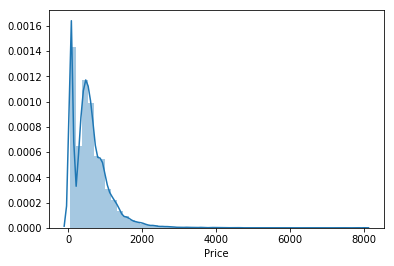

In [272]:
sb.distplot(data_filtered['Price'])

In [273]:
data_filtered.skew()

Price             2.000790
Bedroom           1.811558
Bathroom          1.747290
Parking           2.145097
BuildingArea    148.585125
dtype: float64

In [274]:
data_filtered.kurt()

Price               9.252980
Bedroom            39.239584
Bathroom            6.357808
Parking            29.801076
BuildingArea    24060.980294
dtype: float64

**Question 9**. In problem 8, if the target variable is not normally distributed, we can perform some kind of transformations such as **Log Transformation**. Determine whether you need any transformation, if necessary, perfrom the tranformation and see the results using density plots,skewness, kurtosis. 

**Hint**: You can apply **np.log1p()** which applies log(1+x) to all elements of the **Price**. You can also apply **np.log10()** which is based 10 logarithm.





In [275]:
data_filtered["Price"] = np.log1p(data_filtered["Price"])
data_filtered.head()

,Price,Bedroom,Bathroom,Parking,BuildingArea
0,4.370713,2.0,1.0,1.0,120.0
1,6.958258,2.0,1.0,1.0,120.0
2,6.601026,2.0,1.0,0.0,79.0
3,4.370713,3.0,2.0,1.0,120.0
4,6.948081,3.0,2.0,0.0,150.0


In [276]:
data_filtered.skew()

Price            -0.601881
Bedroom           1.811558
Bathroom          1.747290
Parking           2.145097
BuildingArea    148.585125
dtype: float64

In [277]:
data_filtered.kurt()

Price              -0.706505
Bedroom            39.239584
Bathroom            6.357808
Parking            29.801076
BuildingArea    24060.980294
dtype: float64

**Question 10**. At this point you have a so-called **tidy** data. Latter we will feed this data into linear regression models. 
For this purpose, save predictor columns of the **data_filtered** as **X_data** and the target column as **y_data**. Use **head()** function to see the desired sets.



In [278]:
x_data = data_filtered.drop("Price", axis = 1)
x_data.head()

,Bedroom,Bathroom,Parking,BuildingArea
0,2.0,1.0,1.0,120.0
1,2.0,1.0,1.0,120.0
2,2.0,1.0,0.0,79.0
3,3.0,2.0,1.0,120.0
4,3.0,2.0,0.0,150.0


In [279]:
y_data = data_filtered["Price"]
y_data.head()

0    4.370713
1    6.958258
2    6.601026
3    4.370713
4    6.948081
Name: Price, dtype: float64

## Part II:  Creating and Testing Prediction Models
In this section you will develop  linear regression models and analyze their performance.

**Question 11**. Create training set and test set for the linear models. We use training set to train the models and then  these  models will be tested using the test set. Split the total data into two parts, where 80% of the data goes to training set and 20% data goes to test set. Create the following sets. You can use **train_test_split** function available in sckitlearn library. 

- X_train, y_train
- X_test, y_test



In [280]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_data.shape[0]

29217

In [281]:
print(x_test.shape)
print(x_train.shape)

(5844, 4)
(23373, 4)



**Question 12**. Create and fit following three linear models. Display the coefficients, intercepts of each of the models. In the case of **lm3**, also interpret the coefficients of the model.   
1. **lm1**:  Bathroom as predictor.
2. **lm2**:  Bedroom, Bathroom, and Parking as predictors .
3. **lm3**:  all predictors.


In [292]:
lm1_x = x_train.values[:,1].reshape(-1,1)
lm1_y = y_train

lm1 = LinearRegression()
lm1.fit(lm1_x, lm1_y)
lm1_y_hat = lm1.predict(lm1_x)

print ("Coefficients:", lm1.coef_)
print ("Intercept:", lm1.intercept_)

Coefficients: [0.13503699]
Intercept: 5.822156390268511


In [306]:
lm2_x = x_train.values[0:, :3].reshape(-3,3)
lm2_y = y_train


lm2 = LinearRegression()
lm2.fit(lm2_x, lm2_y)
lm2_y_hat = lm2.predict(lm2_x)

print ("Coefficients:", lm2.coef_)
print ("Intercept:", lm2.intercept_)

Coefficients: [0.10408104 0.05086349 0.02389988]
Intercept: 5.589158721491469


In [284]:
lm3_x = x_train
lm3_y = y_train

lm3 = LinearRegression()
lm3.fit(lm3_x, lm3_y)
lm3_y_hat = lm3.predict(lm3_x)

print ("Coefficients:", lm3.coef_)
print ("Intercept:", lm3.intercept_)

Coefficients: [0.10097379 0.04596828 0.02310117 0.00018565]
Intercept: 5.582307365121066


**Question 13**. Find the MSEs and $R^2$ scores of these models in traning set and the test set. 
1. Choose a model which showed the best performance on the training set. 
2. Choose a model which showed the best performance on the test set. 
3. Was the best model in training set also the best model for test set? 

In [285]:
from sklearn import metrics

In [302]:
print ("MSE:", metrics.mean_squared_error(lm1_y_hat, lm1_y))
print ("R^2:", metrics.r2_score(lm1_y, lm1_y_hat))

MSE: 0.9602162539015239
R^2: 0.008968591132860082


In [309]:
lm1_test_x = x_test.values[:,1].reshape(-1,1)
lm1_test_y = y_test

lm1_test = LinearRegression()
lm1_test.fit(lm1_test_x, lm1_test_y)
lm1_test_y_hat = lm1_test.predict(lm1_test_x)

print ("MSE:", metrics.mean_squared_error(lm1_test_y_hat, lm1_test_y))
print ("R^2:", metrics.r2_score(lm1_test_y, lm1_test_y_hat))

MSE: 0.9594099991907001
R^2: 0.011159518149717162


In [307]:
print ("MSE:", metrics.mean_squared_error(lm2_y_hat, lm2_y))
print ("R^2:", metrics.r2_score(lm2_y, lm2_y_hat))

MSE: 0.9533292571710301
R^2: 0.01607660460894167


In [308]:
lm2_test_x = x_test.values[0:, :3].reshape(-3,3)
lm2_test_y = y_test

lm2_test = LinearRegression()
lm2_test.fit(lm2_test_x, lm2_test_y)
lm2_test_y_hat = lm2_test.predict(lm2_test_x)

print ("MSE:", metrics.mean_squared_error(lm2_test_y_hat, lm2_test_y))
print ("R^2:", metrics.r2_score(lm2_test_y, lm2_test_y_hat))

MSE: 0.9517485169635406
R^2: 0.01905602098331549


In [286]:
print ("MSE:", metrics.mean_squared_error(lm3_y_hat, lm3_y))
print ("R^2:", metrics.r2_score(lm3_y, lm3_y_hat))

MSE: 0.9531103179840077
R^2: 0.016302569968400404


In [287]:
lm3_test_x = x_test
lm3_test_y = y_test

lm3_test = LinearRegression()
lm3_test.fit(lm3_test_x, lm3_test_y)
lm3_test_y_hat = lm3_test.predict(lm3_test_x)

print ("MSE:", metrics.mean_squared_error(lm3_test_y_hat, lm3_test_y))
print ("R^2:", metrics.r2_score(lm3_test_y, lm3_test_y_hat))

MSE: 0.9516794989634171
R^2: 0.019127156152383917


**Question 14**. Develop a sparse linear regression model using LASSO regressor and compare its performance with the previous models. Which of the features is the most important for predicting the housing price? 


In [288]:
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(x_train, y_train) 
print ('Coeff and intercept:', regr_lasso.coef_,  regr_lasso.intercept_)

print ('Training Score:', regr_lasso.score(x_train, y_train) )
print('Testing Score:', regr_lasso.score(x_test, y_test) )

print ('Training MSE: ', np.mean((regr_lasso.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_lasso.predict(x_test) - y_test)**2))

Coeff and intercept: [0.         0.         0.         0.00062744] 5.936681759288084
Training Score: 0.003354834245817062
Testing Score: -0.12445960641479203
Training MSE:  0.9656554564939869
Testing MSE:  1.0909927434015967


**Question 15**. Visualize fitted values (y_hat) vs true values (y) plot. You can choose the best model  and visualize its performance on both training and test data sets. Also, create at least two instances of features and predict corresponding housing prices by using your best model.
 


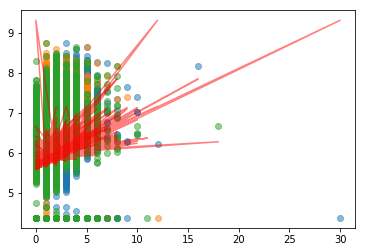

In [313]:
estimator = LinearRegression(fit_intercept = True)
estimator.fit(lm2_x, lm2_y)

plt.plot(lm2_x, lm2_y, "o", alpha = 0.5)
plt.plot(lm2_x, lm2_y_hat, "r", alpha = 0.5)
plt.show()

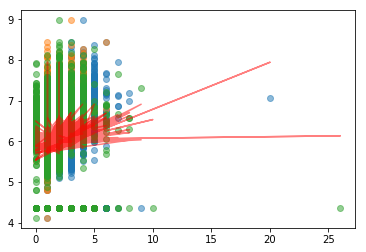

In [314]:
estimator = LinearRegression(fit_intercept = True)
estimator.fit(lm2_test_x, lm2_test_y)

plt.plot(lm2_test_x, lm2_test_y, "o", alpha = 0.5)
plt.plot(lm2_test_x, lm2_test_y_hat, "r", alpha = 0.5)
plt.show()

**Question 16**. Write the project summary.